In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,precision_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import re

In [60]:
df=pd.read_csv('tic.csv')

In [26]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [27]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [28]:
df.dtypes

V1     object
V2     object
V3     object
V4     object
V5     object
V6     object
V7     object
V8     object
V9     object
V10    object
dtype: object

In [30]:
df.shape

(958, 10)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002520D3D2070>,
      dtype=object)

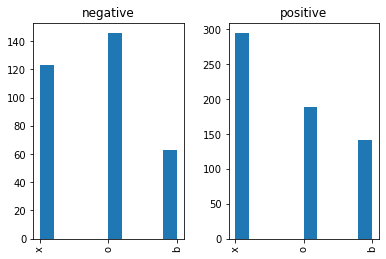

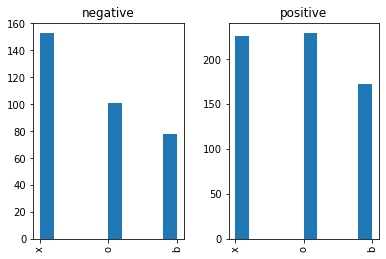

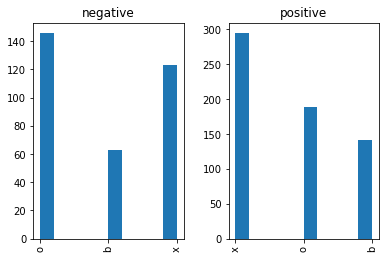

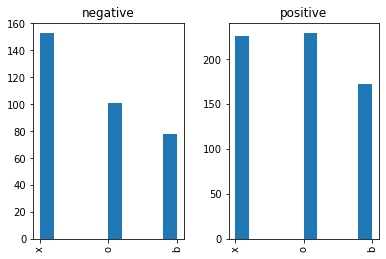

In [35]:
df.V1.hist(by=df.V10)
df.V2.hist(by=df.V10)
df.V3.hist(by=df.V10)
df.V4.hist(by=df.V10)

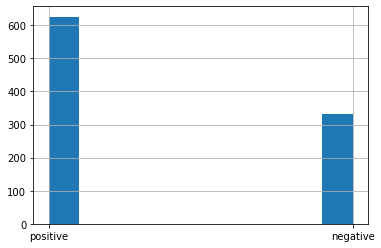

In [36]:
df.V10.hist()


In [61]:
df.replace('x',0,inplace=True)
df.replace('o',1,inplace=True)
df.replace('b',2,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,0,0,0,1,1,0,1,1,positive
1,0,0,0,0,1,1,1,0,1,positive
2,0,0,0,0,1,1,1,1,0,positive
3,0,0,0,0,1,1,1,2,2,positive
4,0,0,0,0,1,1,2,1,2,positive


In [62]:
df.replace('negative',0,inplace=True)
df.replace('positive',1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,0,0,0,1,1,0,1,1,1
1,0,0,0,0,1,1,1,0,1,1
2,0,0,0,0,1,1,1,1,0,1
3,0,0,0,0,1,1,1,2,2,1
4,0,0,0,0,1,1,2,1,2,1


In [63]:
X = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9']]
y = df['V10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
X_train.isnull().mean()

V1    0.0
V2    0.0
V3    0.0
V4    0.0
V5    0.0
V6    0.0
V7    0.0
V8    0.0
V9    0.0
dtype: float64

In [64]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [65]:
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7118


In [66]:
class NB:
    '''
    def calc_statistics(self,feautures,target):
        self.mean=features.groupby(target).apply(np.mean).to_numpy()
        self.var=features.groupby(target).apply(np.var).to_numpy()
        return self.mean,self.var
    '''
    def gauss_density(self,class_idx,x):
        mean=self.mean[class_idx]
        var=self.var[class_idx]
        numerator=np.exp((-1/2)*((x-mean)**2)/(2*var))
        denominator=np.sqrt(2*np.pi*var)
        prob=numerator/denominator
        return prob

    def prior_prob(self,features,target):
        self.prior=(features.groupby(target).apply(lambda x:len(x))/self.rows).to_numpy()
        return self.prior

    def post_prob(self,x):
        posteriors=[]
        for i in range(self.count):
            prior=np.log(self.prior[i])
            conditional=np.sum(np.log(self.gauss_density(i,x)))
            posterior =prior+conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
    
        self.mean=features.groupby(target).apply(np.mean).to_numpy()
        self.var=features.groupby(target).apply(np.var).to_numpy()
        self.prior_prob(features, target)
        
    def predict(self, features):
        preds = [self.post_prob(f) for f in features.to_numpy()]
        return preds

In [67]:
nb = NB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [68]:
print('Model accuracy score [Sklearn]: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score [Built]  : {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score [Sklearn]: 0.7118
Model accuracy score [Built]  : 0.6632


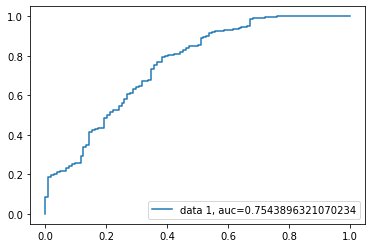

In [72]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
df2=pd.read_csv('Iris.csv')

In [83]:
df2.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


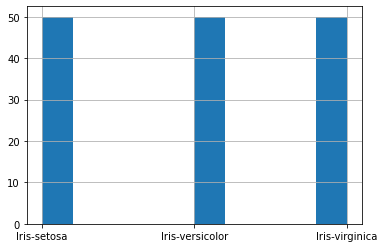

In [87]:
df2.Species.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002520F2D6310>,
      dtype=object)

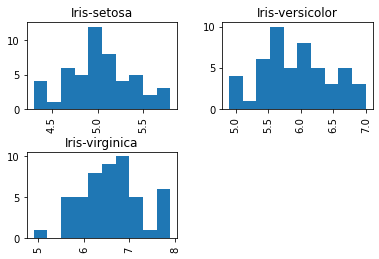

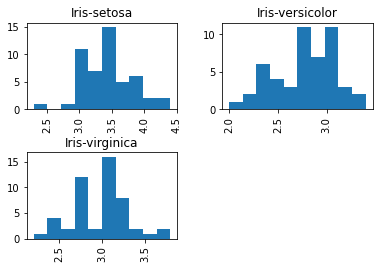

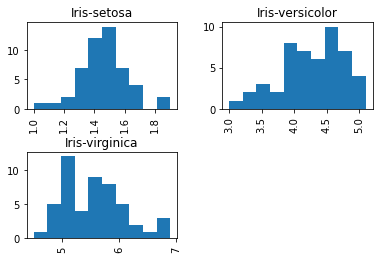

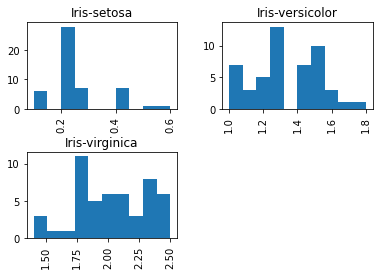

In [90]:
df2.SepalLengthCm.hist(by=df2.Species)
df2.SepalWidthCm.hist(by=df2.Species)
df2.PetalLengthCm.hist(by=df2.Species)
df2.PetalWidthCm.hist(by=df2.Species)

In [74]:
X = df2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df2['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [93]:
X_train.isnull().mean()

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

In [75]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9333


In [109]:
nb = NB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [110]:
print('Model accuracy score [Sklearn]: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score [Built]  : {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score [Sklearn]: 93.3300
Model accuracy score [Built]  : 95.5600


In [80]:
df3=pd.read_csv('spam_or_not_spam.csv',error_bad_lines=False)

In [81]:
df3.groupby('label').count()

,email
label,
0,2500
1,499


In [82]:
df3.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [84]:
df3.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [85]:
df3=df3.replace(np.nan,'hello how are you')

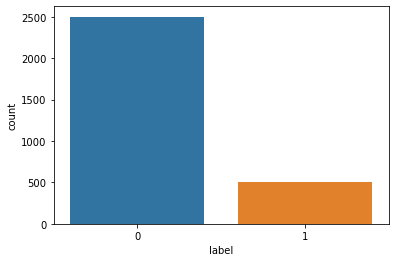

In [86]:
sns.countplot(df3.label)

In [87]:
X = df3['email']
y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [88]:
vecto = TfidfVectorizer()
train_vecto = vecto.fit_transform(X_train.values.astype('U'))
test_vecto = vecto.transform(X_test.values.astype('U'))

In [89]:
nav = MultinomialNB()
nav.fit(train_vecto,y_train)
pred = nav.predict(test_vecto)

In [13]:
print('Model accuracy score [MULTI NB Sklearn]: {0:0.4f}'. format(accuracy_score(y_test, pred)*100))

Model accuracy score [MULTI NB Sklearn]: 85.1111


In [90]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df3['email'])
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, df3['label'], test_size=0.3, random_state=33)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Model accuracy score [GAUSS NB  ~ Sklearn]: {0:0.4f}'. format(accuracy_score(y_test, pred)*100))

Model accuracy score [GAUSS NB  ~ Sklearn]: 82.4444


In [49]:
df3['email'] = df3['email'].str.replace('\W', ' ') # Removes punctuation
df3['email'] =df3['email'].str.lower()

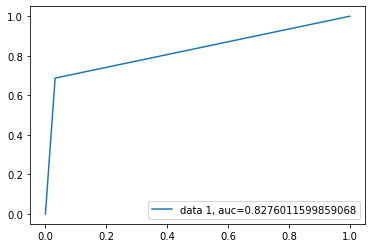

In [91]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
import chardet
file = 'spam.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [13]:
df = pd.read_csv(file,encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'Label'})
df = df.rename(columns={'v2': 'EmailText'})


In [15]:
df['Label'].value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [16]:
df_randomized = df.sample(frac = 1, random_state = 1)
training_test_index = round(len(df_randomized) * 0.8)
train_set = df_randomized[:training_test_index].reset_index(drop=True)
test_set = df_randomized[training_test_index:].reset_index(drop=True)

In [17]:
train_set.head()

,Label,EmailText
0,ham,Convey my regards to him
1,ham,"[‰Û_] anyway, many good evenings to u! s"
2,ham,My sort code is and acc no is . The bank is n...
3,ham,Sorry i din lock my keypad.
4,spam,"Hi babe its Chloe, how r u? I was smashed on s..."


In [18]:
train_set['EmailText'] = train_set['EmailText'].str.replace('\W', ' ')
train_set['EmailText'] = train_set['EmailText'].str.lower()

In [19]:
train_set['EmailText'] = train_set['EmailText'].str.split()
vocabulary = []
for text in train_set['EmailText']:
    for word in text:
        vocabulary.append(word)
vocabulary = list(set(vocabulary))

In [20]:
len(vocabulary)

7766

In [22]:
word_count = {unique_word : [0] * len(train_set['EmailText']) for unique_word in vocabulary}
for i, text in enumerate(train_set['EmailText']):
    for word in text:
        word_count[word][i] += 1

In [23]:
word_count = pd.DataFrame(word_count)
word_count.head()

,brownies,naughty,major,goodevening,dao,spark,parkin,multis,hm,visa,...,____,en,weddin,vday,10,ruining,carlin,outsider,max6,dled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_set = pd.concat([train_set, word_count], axis = 1)


In [25]:
spam = train_set[train_set['Label'] == 'spam']
ham = train_set[train_set['Label'] == 'ham']

#PRIOR PROBABILITIES P[SPAM], P[HAM]
P_spam = len(spam) / len(train_set)
P_ham = len(ham) / len(train_set)

print('PRIOR PROBABILITIES')
print('P[spam] = {}\nP[ham] = {}'.format(P_spam, P_ham))

PRIOR PROBABILITIES
P[spam] = 0.13593539703903096
P[ham] = 0.8640646029609691


In [26]:
n_words_per_spam_message = spam['EmailText'].apply(len)
n_spam = n_words_per_spam_message.sum()
n_words_per_ham_message = ham['EmailText'].apply(len)
n_ham = n_words_per_ham_message.sum()
n_vocabulary = len(vocabulary)

In [28]:
sm_par = 1
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

for word in vocabulary:
    n_word_given_spam = spam[word].sum()
    p_word_given_spam = (n_word_given_spam + sm_par) / (n_spam + sm_par * n_vocabulary)
    parameters_spam[word] = p_word_given_spam
    n_word_given_ham = ham[word].sum()
    p_word_given_ham = (n_word_given_ham + sm_par) / (n_ham + sm_par * n_vocabulary)
    parameters_ham[word] = p_word_given_ham

In [29]:
def predict(text):
    text = re.sub('\W', ' ', text)
    text = text.lower().split()
    P_spam_given_text = P_spam
    P_ham_given_text = P_ham
    for word in text:
        if word in parameters_spam:
            P_spam_given_text *= parameters_spam[word]
        if word in parameters_ham:
              P_ham_given_text *= parameters_ham[word]

    if P_spam_given_text > P_ham_given_text:
        return 'spam'
    else:
        return 'ham'

In [32]:
test_set['predicted'] = test_set['EmailText'].apply(predict)

In [33]:
TP = 0
FP = 0
TN = 0
FN = 0
for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == 'spam' and row['predicted'] == 'spam':
        TP += 1
    elif row['Label'] == 'ham' and row['predicted'] == 'ham':
        TN += 1
    elif row['Label'] == 'spam' and row['predicted'] == 'ham':
        FP += 1
    else:
        FN += 1

In [35]:
Accuracy = (TP+TN) / (TP+TN+FP+FN)
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
F_measure = (2 * Precision * Recall) / (Precision + Recall)

In [36]:
print('---------------------------')
print('Accuracy Measures Report  ')
print('---------------------------')
print('\nTotal no. of correct predictions : ', TP+TN)
print('Total no. of incorrect predictions : ', FP+FN)
print('\nAccuracy : ', Accuracy)
print('Precision : ', Precision)
print('Recall : ', Recall)
print('F_measure : ', F_measure)

---------------------------
Accuracy Measures Report  
---------------------------

Total no. of correct predictions :  1107
Total no. of incorrect predictions :  7

Accuracy :  0.9937163375224417
Precision :  0.9645390070921985
Recall :  0.9855072463768116
F_measure :  0.974910394265233


In [ ]:
X=df['Features']
X = X.apply(lambda x: " ".join(x.lower() for x in x.split()))
X = X.str.replace('[^\w\s]','')
vc=CountVectorizer()
X_vc=vc.fit_transform(X)
X = pd.DataFrame(X_vc.toarray(), columns=vc.get_feature_names())

from sklearn.model_selection import StratifiedKFold
LOO=StratifiedKFold(n_splits=10)
Train_indices=list()
Test_indices=list()
for train_index,test_index in LOO.split(X,y):
    Test_indices.append(test_index)
    Train_indices.append(train_index)
    
    
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
#stop_words = get_stop_words('en')
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

X = X.apply(lambda x: remove_stopWords(x))